In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/spam.csv', encoding='ISO-8859-1')
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.sample(5)

,v1,v2
3818,ham,"sorry brah, just finished the last of my exams..."
2024,ham,U having lunch alone? I now so bored...
787,spam,Ever thought about living a good life with a p...
4744,spam,Camera - You are awarded a SiPix Digital Camer...
1608,ham,Are your freezing ? Are you home yet ? Will yo...


### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Renaming the cols
df.rename(columns = {'v1': "Target", "v2": "Msg"}, inplace = True)

In [8]:
df.sample()

,Target,Msg
5203,ham,Me fine..absolutly fine


In [9]:
df.isnull().sum()

Target    0
Msg       0
dtype: int64

<AxesSubplot:>

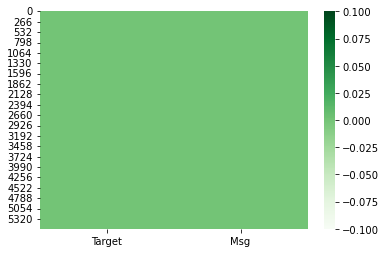

In [10]:
sns.heatmap(df.isnull(), cmap = 'Greens')

## Feature Engineering

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df.sample()

,Target,Msg
4274,0,Haiyoh... Maybe your hamster was jealous of mi...


In [14]:
# Find Duplicates and removing them

df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep = 'first', inplace= True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### EDA

In [18]:
df.head(2)

,Target,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [19]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

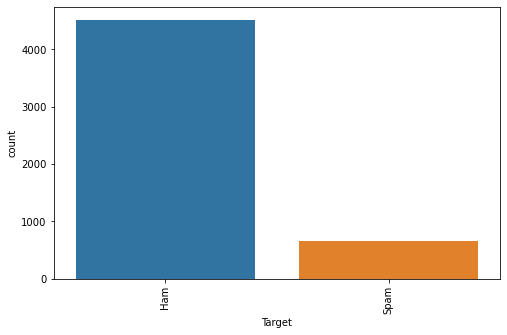

In [20]:
plt.figure(figsize = (8,5) )
bar1 = sns.countplot(df['Target'])
bar1.set_xticklabels(labels = ['Ham','Spam'], rotation = 90)

plt.show()

([<matplotlib.patches.Wedge at 0x13f619ac0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

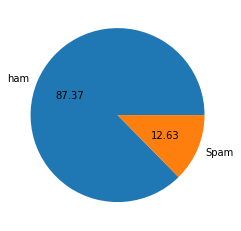

In [21]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'Spam'], autopct = "%0.2f" )

In [22]:
# SMOTE Techniqu to balance the dataset

In [23]:
!pip install nltk

In [24]:
import nltk
from nltk import word_tokenize, sent_tokenize

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhushansharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df.head()

,Target,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# Len of Msg before cleaning
df['Msg_Charactors']= df['Msg'].apply(len)

In [28]:
df.head(4)

,Target,Msg,Msg_Charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [29]:
# Working of word_tokenize
word_tokenize(df['Msg'][0])

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [30]:
df['Msg_word'] = df['Msg'].apply(lambda x: len(word_tokenize(x)))
df['Msg_sentence'] = df['Msg'].apply(lambda x: len(sent_tokenize(x)))

In [31]:
df.head(4)

,Target,Msg,Msg_Charactors,Msg_word,Msg_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [32]:
df[['Msg_Charactors', 'Msg_word', 'Msg_sentence']].describe()

,Msg_Charactors,Msg_word,Msg_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# ham
df[df['Target'] == 0][['Msg_Charactors', 'Msg_word', 'Msg_sentence']].describe()

,Msg_Charactors,Msg_word,Msg_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# Spam
df[df['Target'] == 1][['Msg_Charactors', 'Msg_word', 'Msg_sentence']].describe()

,Msg_Charactors,Msg_word,Msg_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='Msg_Charactors', ylabel='Count'>

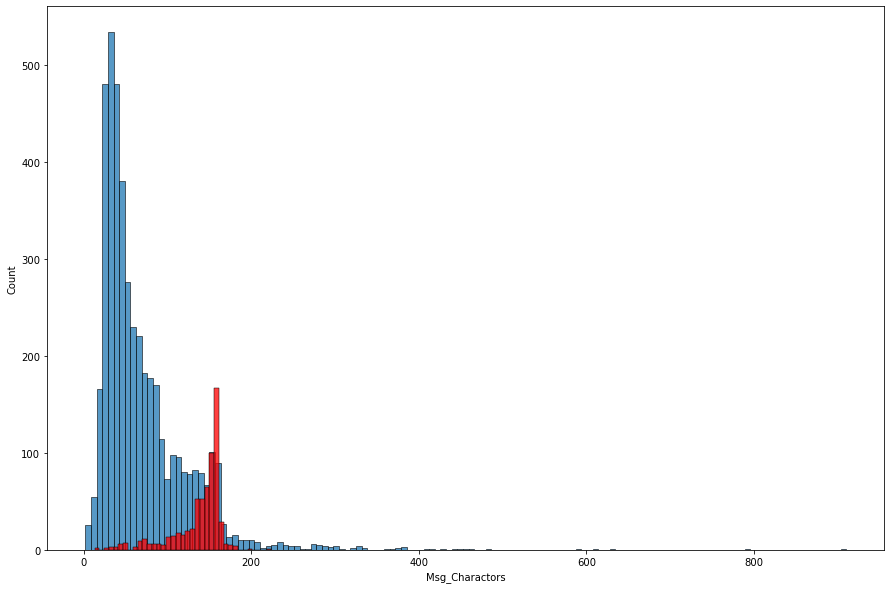

In [35]:
plt.figure(figsize = (15,10))
sns.histplot(df[df['Target']==0]['Msg_Charactors'])
sns.histplot(df[df['Target']==1]['Msg_Charactors'], color = 'red')

<AxesSubplot:xlabel='Msg_word', ylabel='Count'>

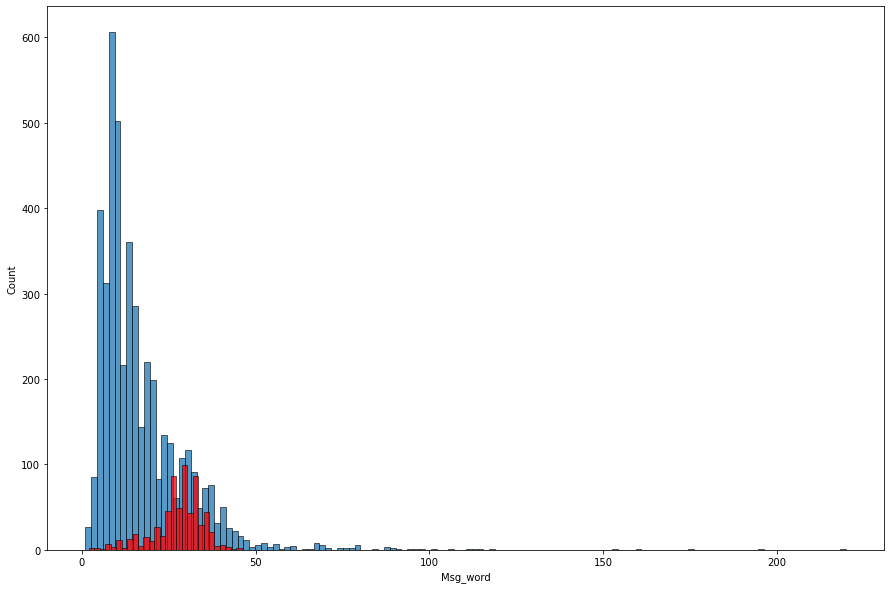

In [36]:
plt.figure(figsize = (15,10))
sns.histplot(df[df['Target']==0]['Msg_word'])
sns.histplot(df[df['Target']==1]['Msg_word'], color = 'red')

<AxesSubplot:xlabel='Msg_sentence', ylabel='Count'>

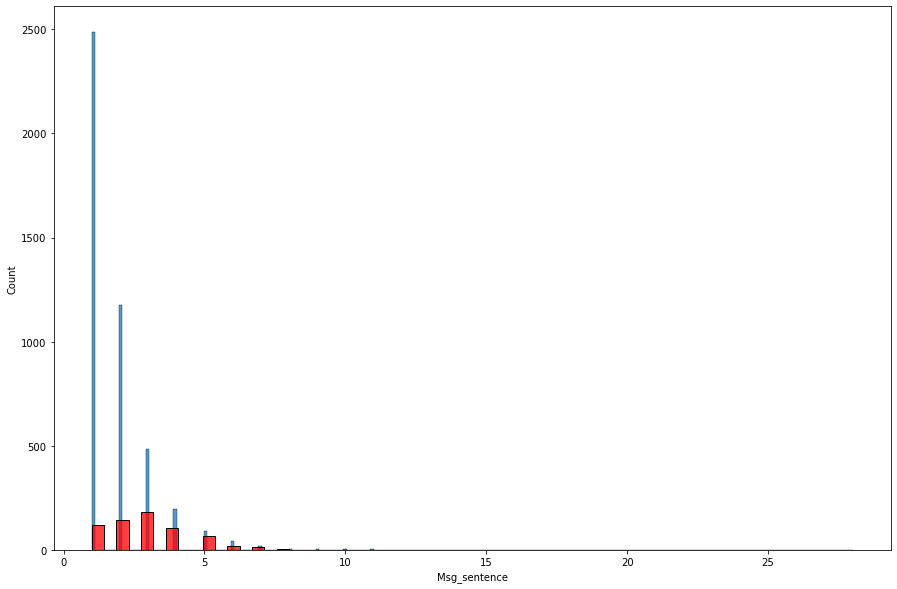

In [37]:
plt.figure(figsize = (15,10))
sns.histplot(df[df['Target']==0]['Msg_sentence'])
sns.histplot(df[df['Target']==1]['Msg_sentence'], color = 'red')

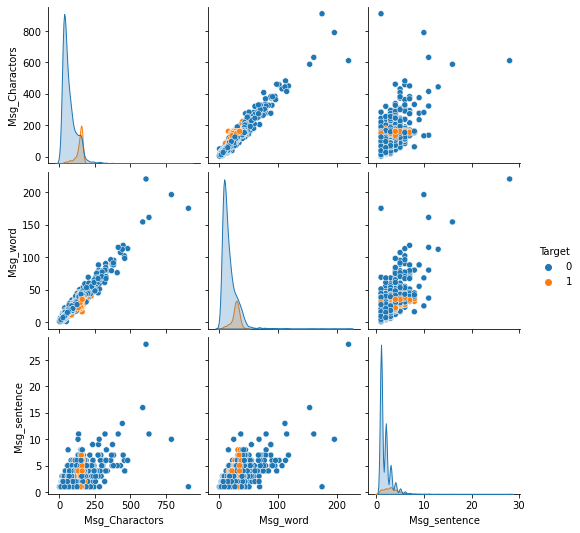

In [38]:
sns.pairplot(df, hue = 'Target')

<AxesSubplot:>

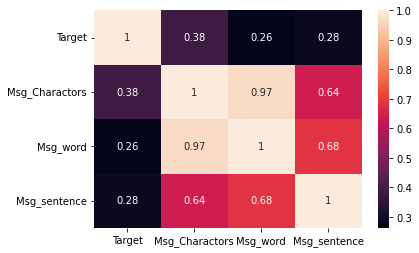

In [39]:
sns.heatmap(df.corr(), annot = True)

## Data Preprocessing
    1. Lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctuation
    5. Stemming

In [40]:
from nltk.corpus import stopwords
stopwords_lst = stopwords.words('english')

import string
str_punctuation = string.punctuation

In [41]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem("Playing")

'play'

In [42]:
print(stopwords_lst)
print("---------------")
print(str_punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
def transform_data(msg):
    
    # Lower case
    msg = msg.lower()
    
    # Tokenization
    msg = word_tokenize(msg)
    
    word = []
    #Removing Special Characters
    for i in msg:
        if i.isalnum():
            word.append(i)
            
    msg = word[:]
    word.clear()
            
    # Removing stop words and punctuation
    for w in msg:
        if w not in stopwords.words('english') and w not in string.punctuation:
            word.append(w)
            
            
    # Stemming
    msg = word[:]
    word.clear()
    
    for w in msg:
        word.append(PorterStemmer().stem(w))
    
            
            
    
    return " ".join(word) 

In [44]:
transform_data("Hi this is 20 %Bhushan okay")

'hi 20 bhushan okay'

In [45]:
df['Msg'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [46]:
transform_data(df['Msg'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
df.head()

,Target,Msg,Msg_Charactors,Msg_word,Msg_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df['Filtered_msg'] = df['Msg'].apply(transform_data)

In [49]:
df.head()

,Target,Msg,Msg_Charactors,Msg_word,Msg_sentence,Filtered_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
 !pip install wordcloud

In [51]:
from wordcloud import WordCloud

In [52]:
wc = WordCloud()

In [53]:
spam_wc = wc.generate(df[df['Target'] == 1]['Filtered_msg'].str.cat(sep = " "))

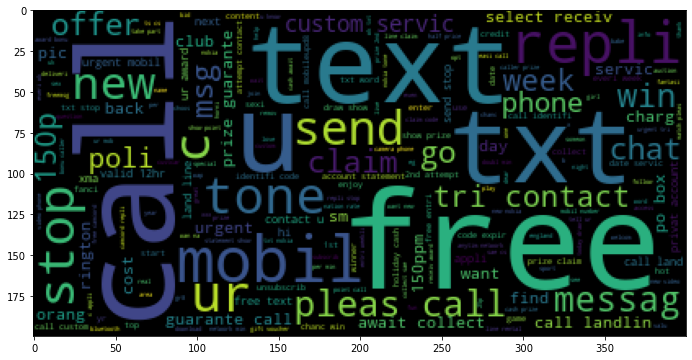

In [54]:
plt.figure(figsize = (20,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['Target'] == 0]['Filtered_msg'].str.cat(sep = " "))

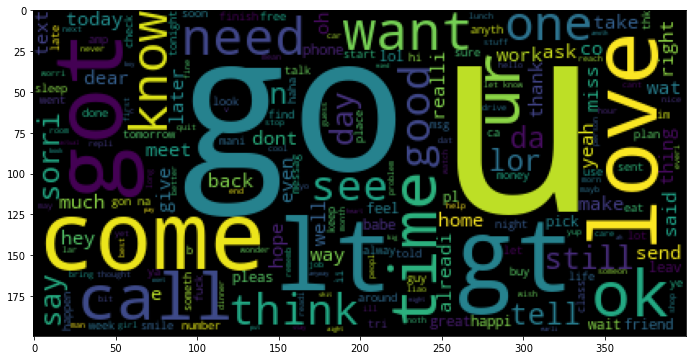

In [56]:
plt.figure(figsize = (20,6))
plt.imshow(ham_wc)

### Top words analysis for spam & ham

In [57]:
word_lst_spam = []
for sent in df[df['Target']==1]['Filtered_msg'].to_list():
    for w in sent.split():
        word_lst_spam.append(w)
 

word_lst_ham = []
for sent in df[df['Target']==0]['Filtered_msg'].to_list():
    for w in sent.split():
        word_lst_ham.append(w)


In [58]:
print(word_lst_spam)
print("---------------------------------------------------------------")
print(word_lst_ham)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [59]:
from collections import Counter
print(Counter(word_lst_spam))
print(Counter(word_lst_ham))

Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, 'offer': 33, 'line': 33, 'go': 32, 'receiv': 31, 'want': 31, 'latest': 30, 'rington': 30, 'landlin': 30, '150ppm': 29, 'video': 29, '1': 28, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'appli': 24, 'r': 24, 'cost': 24, 'end': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'chanc': 22, 'charg': 22, 'sm': 22, 'live': 22, 'poli': 22, 'attempt': 22, 'entri': 21, 'word'

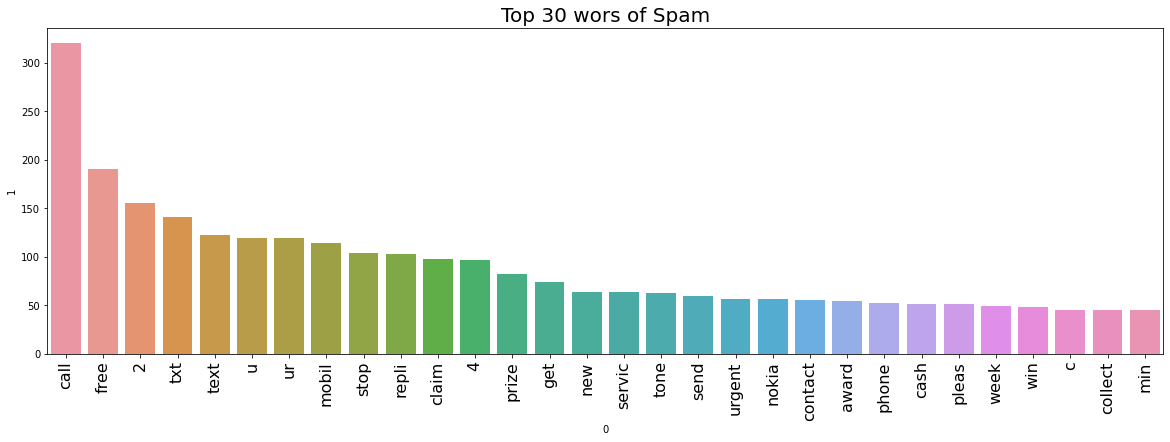

In [60]:
plt.figure(figsize = (20, 6))

plt.title('Top 30 wors of Spam', size = 20)
sns.barplot(pd.DataFrame(Counter(word_lst_spam).most_common(30))[0],pd.DataFrame(Counter(word_lst_spam).most_common(30))[1])
plt.xticks(rotation = 'vertical' , size = 16 )

plt.show()

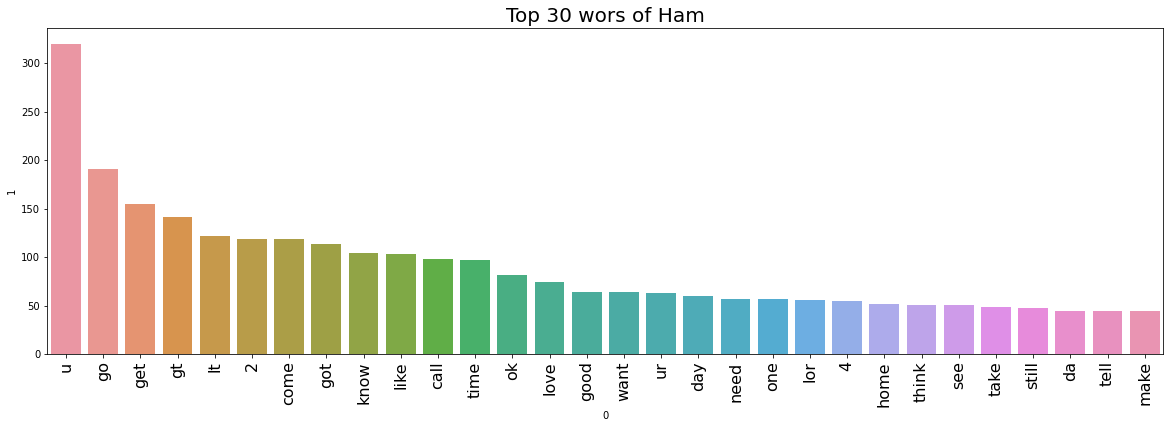

In [61]:
plt.figure(figsize = (20, 6))

plt.title('Top 30 wors of Ham', size = 20)
sns.barplot(pd.DataFrame(Counter(word_lst_ham).most_common(30))[0],pd.DataFrame(Counter(word_lst_spam).most_common(30))[1])
plt.xticks(rotation = 'vertical' , size = 16 )

plt.show()

## Model Building by using Bag of words

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
cv = CountVectorizer()

x = cv.fit_transform(df['Filtered_msg']).toarray()

In [64]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
y  = df['Target']

In [66]:
print('x shape',x.shape)
print('y shape',y.shape)

x shape (5169, 6708)
y shape (5169,)


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [69]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4135, 6708)
(4135,)
(1034, 6708)
(1034,)


In [70]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
print("precision_score:\n",precision_score(y_test, y_pred))

Accuracy Score: 0.8568665377176016
confusion_matrix:
 [[779 129]
 [ 19 107]]
precision_score:
 0.4533898305084746


In [73]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
print("precision_score:\n",precision_score(y_test, y_pred))

Accuracy Score: 0.97678916827853
confusion_matrix:
 [[898  10]
 [ 14 112]]
precision_score:
 0.9180327868852459


In [74]:
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
print("precision_score:\n",precision_score(y_test, y_pred))

Accuracy Score: 0.9642166344294004
confusion_matrix:
 [[906   2]
 [ 35  91]]
precision_score:
 0.978494623655914


## Machine Learning by tfidf

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tf = TfidfVectorizer()

In [77]:
X = tf.fit_transform(df['Filtered_msg']).toarray()

In [78]:
Y = df['Target']

In [79]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.2, random_state = 21)

In [80]:
print(x_train2.shape)
print(y_train2.shape)

print(x_test2.shape)
print(y_test2.shape)

(4135, 6708)
(4135,)
(1034, 6708)
(1034,)


In [81]:
gnb.fit(x_train2, y_train2)
y_pred2 = gnb.predict(x_test2)
print("Accuracy Score:",accuracy_score(y_test2, y_pred2))
print("confusion_matrix:\n",confusion_matrix(y_test2, y_pred2))
print("precision_score:",precision_score(y_test2, y_pred2))

Accuracy Score: 0.8520309477756286
confusion_matrix:
 [[778 130]
 [ 23 103]]
precision_score: 0.44206008583690987


In [82]:
mnb.fit(x_train2, y_train2)
y_pred2 = mnb.predict(x_test2)
print("Accuracy Score:",accuracy_score(y_test2, y_pred2))
print("confusion_matrix:\n",confusion_matrix(y_test2, y_pred2))
print("precision_score:",precision_score(y_test2, y_pred2))

Accuracy Score: 0.9506769825918762
confusion_matrix:
 [[908   0]
 [ 51  75]]
precision_score: 1.0


In [83]:
bnb.fit(x_train2, y_train2)
y_pred2 = bnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test2, y_pred2))
print("confusion_matrix:\n",confusion_matrix(y_test2, y_pred2))
print("precision_score:n",precision_score(y_test2, y_pred2))

Accuracy Score: 0.9642166344294004
confusion_matrix:
 [[906   2]
 [ 35  91]]
precision_score:n 0.978494623655914


### Other ML Algorithms

In [139]:
# !pip install xgboost

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [141]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [142]:
models = {
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb    
}

In [143]:
def training_classifier(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    test_accuracy = accuracy_score(y_test, pred)
    train_accuracy = accuracy_score(y_train, train_pred)
    precision = precision_score(y_test, pred)
    
    return test_accuracy, precision, train_accuracy

In [144]:
test_acc = []
precision_s = []
train_acc = []

for name, ob in models.items():
    test_accuracy, current_precision, train_accuracy = training_classifier(ob, x_train2, y_train2, x_test2, y_test2)
    
    print("Name: ", name)
    print("Accuracy: ", test_accuracy)
    print("Precision: ", current_precision)
    print("Train_accuracy: ",train_accuracy)
    
    test_acc.append(test_accuracy)
    precision_s.append(current_precision)
    train_acc.append(train_accuracy)


Name:  SVC
Accuracy:  0.9622823984526112
Precision:  1.0
Train_accuracy:  0.9973397823458283
Name:  KN
Accuracy:  0.9052224371373307
Precision:  1.0
Train_accuracy:  0.9182587666263603
Name:  NB
Accuracy:  0.9506769825918762
Precision:  1.0
Train_accuracy:  0.9724304715840387
Name:  DT
Accuracy:  0.941972920696325
Precision:  0.7578125
Train_accuracy:  1.0
Name:  LR
Accuracy:  0.9400386847195358
Precision:  0.9705882352941176
Train_accuracy:  0.9644498186215236
Name:  RF
Accuracy:  0.9661508704061895
Precision:  1.0
Train_accuracy:  0.999758162031439
Name:  AdaBoost
Accuracy:  0.9545454545454546
Precision:  0.883495145631068
Train_accuracy:  0.9770253929866989
Name:  Bgc
Accuracy:  0.9516441005802708
Precision:  0.8584905660377359
Train_accuracy:  0.9956469165659009
Name:  ETC
Accuracy:  0.9709864603481625
Precision:  1.0
Train_accuracy:  1.0
Name:  GBDT
Accuracy:  0.9535783365570599
Precision:  0.9148936170212766
Train_accuracy:  0.9808948004836759
Name:  xgb
Accuracy:  0.969052224371

In [145]:
performance_df = pd.DataFrame()
performance_df['Models']=models.keys()
performance_df['Test Acuuracy'] = test_acc
performance_df['Train Acuuracy'] = train_acc
performance_df['Precision_1'] = precision_s

In [146]:
performance_df

,Models,Test Acuuracy,Train Acuuracy,Precision_1
0,SVC,0.962282,0.997340,1.000000
1,KN,0.905222,0.918259,1.000000
2,NB,0.950677,0.972430,1.000000
3,DT,0.941973,1.000000,0.757812
4,LR,0.940039,0.964450,0.970588
5,RF,0.966151,0.999758,1.000000
6,AdaBoost,0.954545,0.977025,0.883495
7,Bgc,0.951644,0.995647,0.858491
8,ETC,0.970986,1.000000,1.000000
9,GBDT,0.953578,0.980895,0.914894


## Model Building By apply max_features parameter as 3000

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
df.head()

,Target,Msg,Msg_Charactors,Msg_word,Msg_sentence,Filtered_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
tfidf = TfidfVectorizer(max_features = 3000)

In [150]:
X1 = tfidf.fit_transform(df['Filtered_msg']).toarray()

In [151]:
X1.shape

(5169, 3000)

In [152]:
Y1 = df['Target']

In [153]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X1, Y1, test_size = 0.2, random_state = 21)

In [154]:
test_acc = []
precision_s = []
train_acc = []

for name, ob in models.items():
    test_accuracy, current_precision, train_accuracy = training_classifier(ob, x_train3, y_train3, x_test3, y_test3)
    
    print("Name: ", name)
    print("Accuracy: ", test_accuracy)
    print("Precision: ", current_precision)
    print("Train_accuracy: ",train_accuracy)
    
    test_acc.append(test_accuracy)
    precision_s.append(current_precision)
    train_acc.append(train_accuracy)



Name:  SVC
Accuracy:  0.9700193423597679
Precision:  0.9896907216494846
Train_accuracy:  0.9966142684401451
Name:  KN
Accuracy:  0.9110251450676983
Precision:  1.0
Train_accuracy:  0.9257557436517533
Name:  NB
Accuracy:  0.965183752417795
Precision:  1.0
Train_accuracy:  0.9818621523579202
Name:  DT
Accuracy:  0.9468085106382979
Precision:  0.784
Train_accuracy:  0.9995163240628778
Name:  LR
Accuracy:  0.9468085106382979
Precision:  0.961038961038961
Train_accuracy:  0.9692865779927449
Name:  RF
Accuracy:  0.9690522243713733
Precision:  0.9895833333333334
Train_accuracy:  0.9995163240628778
Name:  AdaBoost
Accuracy:  0.9584139264990329
Precision:  0.8952380952380953
Train_accuracy:  0.9784764207980653
Name:  Bgc
Accuracy:  0.9526112185686654
Precision:  0.8468468468468469
Train_accuracy:  0.9966142684401451
Name:  ETC
Accuracy:  0.9758220502901354
Precision:  1.0
Train_accuracy:  0.9995163240628778
Name:  GBDT
Accuracy:  0.9526112185686654
Precision:  0.9139784946236559
Train_accuracy:

In [155]:
performance_df['Test Acuuracy_2'] = test_acc
performance_df['Train Acuuracy_2'] = train_acc
performance_df['Precision_2'] = precision_s

In [156]:
performance_df

,Models,Test Acuuracy,Train Acuuracy,Precision_1,Test Acuuracy_2,Train Acuuracy_2,Precision_2
0,SVC,0.962282,0.997340,1.000000,0.970019,0.996614,0.989691
1,KN,0.905222,0.918259,1.000000,0.911025,0.925756,1.000000
2,NB,0.950677,0.972430,1.000000,0.965184,0.981862,1.000000
3,DT,0.941973,1.000000,0.757812,0.946809,0.999516,0.784000
4,LR,0.940039,0.964450,0.970588,0.946809,0.969287,0.961039
5,RF,0.966151,0.999758,1.000000,0.969052,0.999516,0.989583
6,AdaBoost,0.954545,0.977025,0.883495,0.958414,0.978476,0.895238
7,Bgc,0.951644,0.995647,0.858491,0.952611,0.996614,0.846847
8,ETC,0.970986,1.000000,1.000000,0.975822,0.999516,1.000000
9,GBDT,0.953578,0.980895,0.914894,0.952611,0.979202,0.913978


## Model building

In [158]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [160]:
X4 = tfidf.fit_transform(df['Msg']).toarray()

#### Scalling

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X4 = scaler.fit_transform(X)

In [166]:
Y4 = df['Target'].values

In [167]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size = 0.2, random_state = 21)

In [168]:
test_acc = []
precision_s = []
train_acc = []

for name, ob in models.items():
    test_accuracy, current_precision, train_accuracy = training_classifier(ob, x_train4, y_train4, x_test4, y_test4)
    
    print("Name: ", name)
    print("Accuracy: ", test_accuracy)
    print("Precision: ", current_precision)
    print("Train_accuracy: ",train_accuracy)
    
    test_acc.append(test_accuracy)
    precision_s.append(current_precision)
    train_acc.append(train_accuracy)

Name:  SVC
Accuracy:  0.9584139264990329
Precision:  0.9108910891089109
Train_accuracy:  0.9970979443772672
Name:  KN
Accuracy:  0.8984526112185687
Precision:  1.0
Train_accuracy:  0.9124546553808948
Name:  NB
Accuracy:  0.9787234042553191
Precision:  0.9333333333333333
Train_accuracy:  0.9949214026602177
Name:  DT
Accuracy:  0.9468085106382979
Precision:  0.7886178861788617
Train_accuracy:  1.0
Name:  LR
Accuracy:  0.9564796905222437
Precision:  1.0
Train_accuracy:  0.9915356711003628
Name:  RF
Accuracy:  0.965183752417795
Precision:  1.0
Train_accuracy:  1.0
Name:  AdaBoost
Accuracy:  0.9545454545454546
Precision:  0.883495145631068
Train_accuracy:  0.9770253929866989
Name:  Bgc
Accuracy:  0.9535783365570599
Precision:  0.8482142857142857
Train_accuracy:  0.9951632406287787
Name:  ETC
Accuracy:  0.971953578336557
Precision:  1.0
Train_accuracy:  1.0
Name:  GBDT
Accuracy:  0.9545454545454546
Precision:  0.9247311827956989
Train_accuracy:  0.9808948004836759
Name:  xgb
Accuracy:  0.969

In [169]:
performance_df['Test Acuuracy_3'] = test_acc
performance_df['Train Acuuracy_3'] = train_acc
performance_df['Precision_3'] = precision_s

In [170]:
performance_df

,Models,Test Acuuracy,Train Acuuracy,Precision_1,Test Acuuracy_2,Train Acuuracy_2,Precision_2,Test Acuuracy_3,Train Acuuracy_3,Precision_3
0,SVC,0.962282,0.997340,1.000000,0.970019,0.996614,0.989691,0.958414,0.997098,0.910891
1,KN,0.905222,0.918259,1.000000,0.911025,0.925756,1.000000,0.898453,0.912455,1.000000
2,NB,0.950677,0.972430,1.000000,0.965184,0.981862,1.000000,0.978723,0.994921,0.933333
3,DT,0.941973,1.000000,0.757812,0.946809,0.999516,0.784000,0.946809,1.000000,0.788618
4,LR,0.940039,0.964450,0.970588,0.946809,0.969287,0.961039,0.956480,0.991536,1.000000
5,RF,0.966151,0.999758,1.000000,0.969052,0.999516,0.989583,0.965184,1.000000,1.000000
6,AdaBoost,0.954545,0.977025,0.883495,0.958414,0.978476,0.895238,0.954545,0.977025,0.883495
7,Bgc,0.951644,0.995647,0.858491,0.952611,0.996614,0.846847,0.953578,0.995163,0.848214
8,ETC,0.970986,1.000000,1.000000,0.975822,0.999516,1.000000,0.971954,1.000000,1.000000
9,GBDT,0.953578,0.980895,0.914894,0.952611,0.979202,0.913978,0.954545,0.980895,0.924731


## MODEL BUILDING WITH ONE EXTRACT FEATURE 

In [107]:
tfidf = TfidfVectorizer(max_features = 3000)
import numpy as np

In [108]:
X5 = tfidf.fit_transform(df['Msg']).toarray()

In [98]:
# Apending the num_character col to x
X5 = np.hstack((X5, df['Msg_Charactors'].values.reshape(-1,1)))

In [109]:
X5.shape

(5169, 3000)

In [110]:
Y5 = df['Target'].values

In [111]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 21)

In [112]:
test_acc = []
precision_s = []
train_acc = []

for name, ob in models.items():
    test_accuracy, current_precision, train_accuracy = training_classifier(ob, x_train5, y_train5, x_test5, y_test5)
    
    print("Name: ", name)
    print("Accuracy: ", test_accuracy)
    print("Precision: ", current_precision)
    print("Train_accuracy: ",train_accuracy)
    
    test_acc.append(test_accuracy)
    precision_s.append(current_precision)
    train_acc.append(train_accuracy)

NameError: name 'models' is not defined

In [229]:
performance_df['Test Acuuracy_4'] = test_acc
performance_df['Train Acuuracy_4'] = train_acc
performance_df['Precision_4'] = precision_s

In [230]:
performance_df

,Models,Test Acuuracy,Train Acuuracy,Precision_1,Test Acuuracy_2,Train Acuuracy_2,Precision_2,Test Acuuracy_3,Train Acuuracy_3,Precision_3,Test Acuuracy_4,Train Acuuracy_4,Precision_4
0,SVC,0.962282,0.997340,1.000000,0.970019,0.996614,0.989691,0.958414,0.997098,0.910891,0.973888,0.996614,0.990099
1,KN,0.905222,0.918259,1.000000,0.911025,0.925756,1.000000,0.898453,0.912455,1.000000,0.909091,0.927449,1.000000
2,NB,0.950677,0.972430,1.000000,0.965184,0.981862,1.000000,0.978723,0.994921,0.933333,0.962282,0.981620,1.000000
3,DT,0.941973,1.000000,0.757812,0.946809,0.999516,0.784000,0.946809,1.000000,0.788618,0.957447,1.000000,0.830645
4,LR,0.940039,0.964450,0.970588,0.946809,0.969287,0.961039,0.956480,0.991536,1.000000,0.958414,0.976784,0.966292
5,RF,0.966151,0.999758,1.000000,0.969052,0.999516,0.989583,0.965184,1.000000,1.000000,0.975822,1.000000,1.000000
6,AdaBoost,0.954545,0.977025,0.883495,0.958414,0.978476,0.895238,0.954545,0.977025,0.883495,0.966151,0.982830,0.917431
7,Bgc,0.951644,0.995647,0.858491,0.952611,0.996614,0.846847,0.953578,0.995163,0.848214,0.965184,0.995889,0.916667
8,ETC,0.970986,1.000000,1.000000,0.975822,0.999516,1.000000,0.971954,1.000000,1.000000,0.979691,1.000000,1.000000
9,GBDT,0.953578,0.980895,0.914894,0.952611,0.979202,0.913978,0.954545,0.980895,0.924731,0.965184,0.984764,0.959184


In [231]:
# As we can see we are getting maxium accuracy of test data from ETC and it is also having 100 percent percision
#value,
# as train data and test data accuracy is not having much difference, so we can say it is neighter overfitted nor 
# Under fitted model

In [232]:
# Votting Classifier

In [233]:
svc = SVC()
mnb = MultinomialNB()
etc = ExtraTreesClassifier()

In [234]:
from sklearn.ensemble import VotingClassifier

In [235]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb',mnb),('et', etc)], voting = 'soft')

In [236]:
voting.fit(x_train5, y_train5)

VotingClassifier(estimators=[('svm', SVC()), ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier())],
                 voting='soft')

In [113]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
def training_classifier(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    test_accuracy = accuracy_score(y_test, pred)
    train_accuracy = accuracy_score(y_train, train_pred)
    precision = precision_score(y_test, pred)
    
    return test_accuracy, precision, train_accuracy

In [115]:
etc = MultinomialNB()

etc.fit(x_train5, y_train5)
pred = etc.predict(x_test5)
train_pred = etc.predict(x_train5)
test_accuracy = accuracy_score(y_test5, pred)
train_accuracy = accuracy_score(y_train5, train_pred)
precision = precision_score(y_test5, pred)
    
print('Test Accuracy', test_accuracy)
print('Train Accuracy', train_accuracy)
print('Precision', precision)

Test Accuracy 0.9622823984526112
Train Accuracy 0.9816203143893591
Precision 1.0


In [116]:
import pickle

In [117]:
pickle.dump(tfidf, open('vectirization.pkl', 'wb'))
pickle.dump(etc, open('model.pkl', 'wb'))